In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

torch.__version__

'2.0.1+cu118'

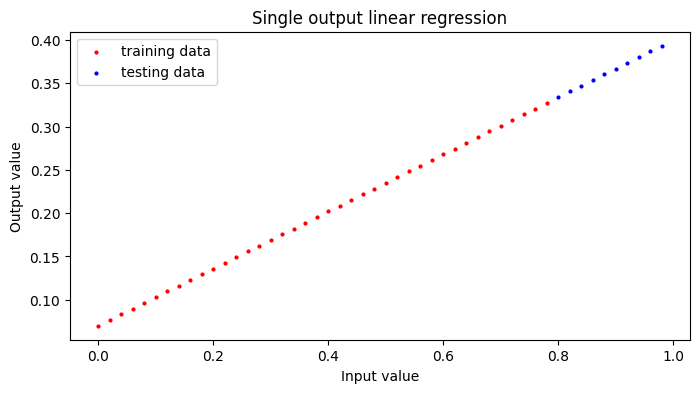

In [3]:
# Single output linear regression
weight = 0.33
bias = 0.07

# output = weight * parameters + bias
parameters = torch.arange(0, 1, 0.02)
output = weight * parameters + bias

split = int(len(output)*0.8)
train_param, train_output = parameters[:split], output[:split]
test_param, test_output = parameters[split:], output[split:]

plt.figure(figsize=(8,4))
plt.scatter(train_param, train_output, color="red", label="training data", s=4)
plt.scatter(test_param, test_output, color="blue", label="testing data", s=4)
plt.title("Single output linear regression")
plt.xlabel("Input value")
plt.ylabel("Output value")
plt.legend()
plt.show()

In [4]:
# Linear Regression Model (Must inherits nn.Module class)
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

    # Override the forward function
    def forward(self, x: torch.Tensor):
        # Linear Regression Formula
        return self.weights * x + self.bias

In [5]:
# Function to plot graph

def plot(training_data, true_train, testing_data, test_train, prediction=None, title=None):
    plt.figure(figsize=(8,4))
    plt.scatter(training_data, true_train, color="red", label="training data", s=4)
    plt.scatter(testing_data, test_train, color="blue", label="testing data", s=4)

    if prediction is not None:
        plt.scatter(testing_data, prediction, color="green", label="prediction", s=4)

    plt.title(title)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.show()

Epoch: 0 | MAE Train Loss: 1.1773889064788818 | MAE Test Loss: 1.590052604675293 
Epoch: 10 | MAE Train Loss: 1.0621790885925293 | MAE Test Loss: 1.4553427696228027 
Epoch: 20 | MAE Train Loss: 0.946969211101532 | MAE Test Loss: 1.320633053779602 
Epoch: 30 | MAE Train Loss: 0.8317593336105347 | MAE Test Loss: 1.1859230995178223 
Epoch: 40 | MAE Train Loss: 0.7165495157241821 | MAE Test Loss: 1.0512133836746216 
Epoch: 50 | MAE Train Loss: 0.6013396382331848 | MAE Test Loss: 0.9165035486221313 
Epoch: 60 | MAE Train Loss: 0.4861297011375427 | MAE Test Loss: 0.7817935943603516 
Epoch: 70 | MAE Train Loss: 0.370919793844223 | MAE Test Loss: 0.6470837593078613 
Epoch: 80 | MAE Train Loss: 0.25570979714393616 | MAE Test Loss: 0.5123737454414368 
Epoch: 90 | MAE Train Loss: 0.15454676747322083 | MAE Test Loss: 0.3873952031135559 
Epoch: 100 | MAE Train Loss: 0.10872423648834229 | MAE Test Loss: 0.3021917939186096 
Epoch: 110 | MAE Train Loss: 0.09048309922218323 | MAE Test Loss: 0.247516915

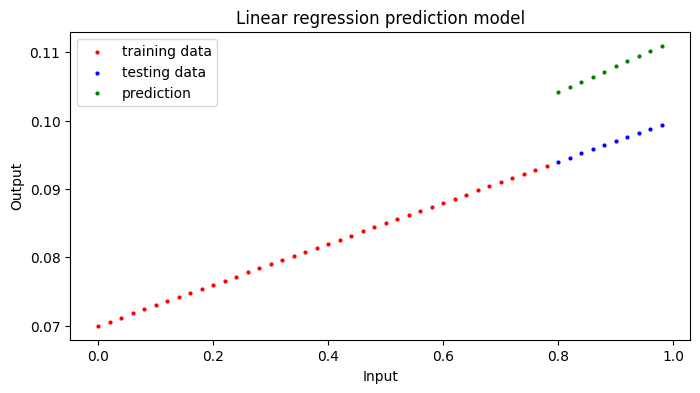

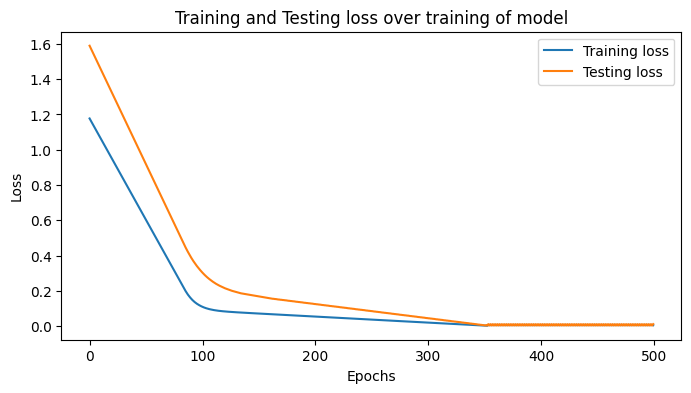

OrderedDict([('weights', tensor([0.0377])), ('bias', tensor([0.0740]))])

In [6]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Single output linear regression (True values)
weight = 0.03
bias = 0.07

# output = weight * parameters + bias
parameters = torch.arange(0, 1, 0.02)
output = weight * parameters + bias

split = int(len(output)*0.8)
train_param, train_output = parameters[:split], output[:split]
test_param, test_output = parameters[split:], output[split:]

model = LinearRegressionModel()
# print(list(model.parameters()))
# print(model.state_dict())

# Loss function
loss_function = nn.L1Loss()
# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# 1 epoch is 1 loop over the code
epochs = 500
for epoch in range (epochs):
    # Set the model to training mode
    model.train()
    # Forward propagation on training data using forward method
    predicted = model(train_param)
    # Calculate the loss. loss(input, target)
    error = loss_function(predicted, train_output)
    # Zero the gradient at each epoch as it accmulates
    optimizer.zero_grad()
    # Compute change to gradient loss to the each weight
    error.backward()
    # Update the weights wrt gradient calculated
    optimizer.step()

    # Testing
    # Put the model in evaluation mode (Turns off layers not needed for evaluation)
    model.eval()

    with torch.inference_mode(): # Turns off gradient tracking when testing
        # Run the model with test data
        test_pred = model(test_param)
        test_error = loss_function(test_pred, test_output.type(torch.float))

        train_loss_values.append(error.detach().numpy())
        test_loss_values.append(test_error.detach().numpy())
        epoch_count.append(epoch)

        # Print stats
        if (epoch % 10) == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {error} | MAE Test Loss: {test_error} ")

prediction_after_training = model(test_param)
plot(train_param, train_output, test_param, test_output, prediction_after_training.detach().numpy(), "Linear regression prediction model")

plt.figure(figsize=(8,4))
plt.plot(epoch_count, train_loss_values, label= "Training loss")
plt.plot(epoch_count, test_loss_values, label="Testing loss")
plt.title("Training and Testing loss over training of model")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

model.state_dict()

In [7]:
# Save a trained model (saving the state dict)
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "pytorch_workflow_model.pth"
model_save_path = model_path / model_name

# torch.save() takes two parameters: state dict and path
torch.save(model.state_dict(), model_save_path)

In [8]:
# Loading a saved model

# Create a new model
new_model = LinearRegressionModel()

# Load the saved state dict into the model
new_model.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [9]:
# Another way to create a Linear Regression Model

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# Create data
weight = 1.5
bias = 0.4

start = 0
end = 2
step = 0.05

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    # Returning the linear layer itself (Built-in Linear Regression Formula)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the seed for convenience
torch.manual_seed(69)
model_1 = LinearRegressionModelV2()
# print(model_1.state_dict())

# Use GPU if available
model_1.to(device)

loss_function_1 = nn.L1Loss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

epochs = 2650

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_function_1(y_pred, y_train)
    optimizer_1.zero_grad()
    loss.backward()
    optimizer_1.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_error = loss_function_1(test_pred, y_test.type(torch.float))

        if (epoch % 10) == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_error} ")
            
model_1.state_dict()

Device: cuda
Epoch: 0 | MAE Train Loss: 0.46718642115592957 | MAE Test Loss: 1.246042013168335 
Epoch: 10 | MAE Train Loss: 0.45797836780548096 | MAE Test Loss: 1.2268675565719604 
Epoch: 20 | MAE Train Loss: 0.44877034425735474 | MAE Test Loss: 1.207693099975586 
Epoch: 30 | MAE Train Loss: 0.43956229090690613 | MAE Test Loss: 1.1885186433792114 
Epoch: 40 | MAE Train Loss: 0.4303542673587799 | MAE Test Loss: 1.169344186782837 
Epoch: 50 | MAE Train Loss: 0.4216601848602295 | MAE Test Loss: 1.150744915008545 
Epoch: 60 | MAE Train Loss: 0.4134642481803894 | MAE Test Loss: 1.1325290203094482 
Epoch: 70 | MAE Train Loss: 0.40526825189590454 | MAE Test Loss: 1.114313006401062 
Epoch: 80 | MAE Train Loss: 0.3970722556114197 | MAE Test Loss: 1.0960969924926758 
Epoch: 90 | MAE Train Loss: 0.3888762593269348 | MAE Test Loss: 1.077881097793579 
Epoch: 100 | MAE Train Loss: 0.3812914490699768 | MAE Test Loss: 1.0603742599487305 
Epoch: 110 | MAE Train Loss: 0.37406492233276367 | MAE Test Loss

OrderedDict([('linear_layer.weight', tensor([[1.4993]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4000], device='cuda:0'))])

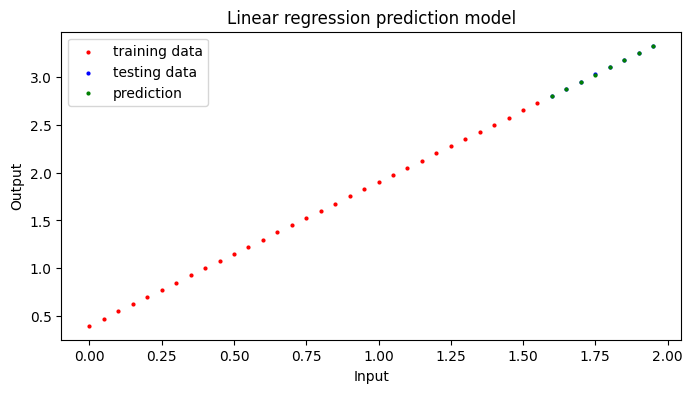

In [10]:
model_1.eval()

with torch.inference_mode():
    y_pred = model_1(X_test)

plot(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), y_pred.cpu(), "Linear regression prediction model")

In [11]:
model_1_path = Path("models")
model_1_path.mkdir(parents=True, exist_ok=True)

model_1_name = "pytorch_workflow_1.ipynb"
model_1_save_path = model_1_path / model_1_name

torch.save(model_1.state_dict(), model_1_save_path)

#### Exercise to create a linear regression model    

Device: cuda


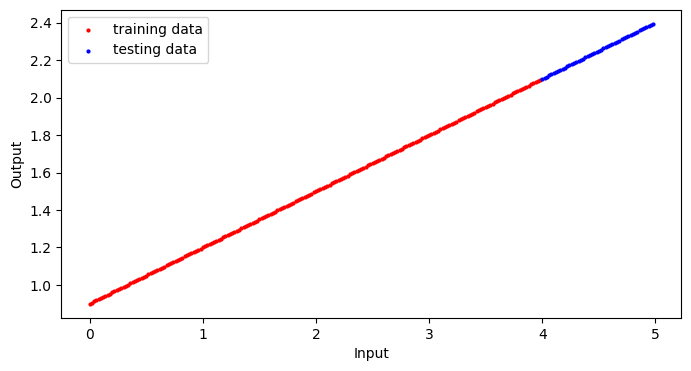

Epoch: 0 | MAE Train Loss: 2.686379909515381 | MAE Test Loss: 5.818878650665283 
Epoch: 20 | MAE Train Loss: 1.6989688873291016 | MAE Test Loss: 3.8347625732421875 
Epoch: 40 | MAE Train Loss: 0.7736193537712097 | MAE Test Loss: 1.8973958492279053 
Epoch: 60 | MAE Train Loss: 0.16998612880706787 | MAE Test Loss: 0.37181198596954346 
Epoch: 80 | MAE Train Loss: 0.12073864042758942 | MAE Test Loss: 0.18567126989364624 
Epoch: 100 | MAE Train Loss: 0.09015781432390213 | MAE Test Loss: 0.13787735998630524 
Epoch: 120 | MAE Train Loss: 0.05957694724202156 | MAE Test Loss: 0.09008343517780304 
Epoch: 140 | MAE Train Loss: 0.028996076434850693 | MAE Test Loss: 0.042289458215236664 
Epoch: 160 | MAE Train Loss: 0.01738092303276062 | MAE Test Loss: 0.08208387345075607 
Epoch: 180 | MAE Train Loss: 0.008680648170411587 | MAE Test Loss: 0.09266901016235352 
Epoch: 200 | MAE Train Loss: 0.008380595594644547 | MAE Test Loss: 0.09296905249357224 
Epoch: 220 | MAE Train Loss: 0.008380595594644547 | M

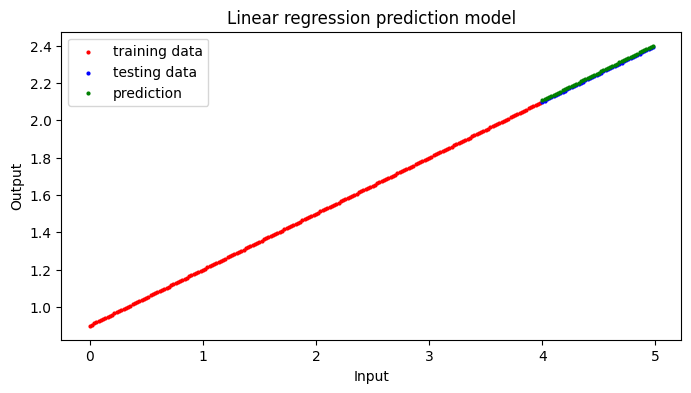

In [36]:
# 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

weight = 0.3
bias = 0.9

start = 0
end = 5
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_test_split = int(0.8 * len(X))
X_train, y_train = X[:train_test_split], y[:train_test_split]
X_test, y_test = X[train_test_split:], y[train_test_split:]

plot(X_train, y_train, X_test, y_test)

# 2. Build a PyTorch model by subclassing nn.Module
torch.manual_seed(87)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

class LinearRegressionModel_ex(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

model_ex = LinearRegressionModel_ex()
model_ex.to(device)
# model_ex.state_dict()

# 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
loss_function_ex = nn.L1Loss()
optimizer_ex = torch.optim.SGD(params=model_ex.parameters(), lr=0.01)

epochs = 300
for epoch in range(epochs):
    model_ex.train()
    y_pred = model_ex(X_train)
    loss = loss_function_ex(y_pred, y_train)
    optimizer_ex.zero_grad()
    loss.backward()
    optimizer_ex.step()

    if (epoch % 20) == 0:
        model_ex.eval()

        with torch.inference_mode():
            test_pred = model_ex(X_test)
            test_loss = loss_function_ex(test_pred, y_test)

            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

# 4. Make predictions with the trained model on the test data.
model_ex.state_dict()

model_ex.eval()
with torch.inference_mode():
    final_test_pred = model_ex(X_test)

plot(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), final_test_pred.cpu(), "Linear regression prediction model")
model_ex.state_dict()

# 5. Save your trained model's state_dict() to file.
model_ex_path = Path("models")
model_ex_path.mkdir(parents=True, exist_ok=True)

model_ex_name = "pytorch_workflow_ex.ipynb"
model_ex_save_path = model_ex_path / model_ex_name

torch.save(model_ex.state_dict(), model_ex_save_path)
